In [850]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Common Tools
from sklearn.preprocessing import LabelEncoder
from collections import Counter

#Algorithms
from sklearn import ensemble, tree, svm, naive_bayes, neighbors, linear_model, gaussian_process, neural_network
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Model
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
#from sklearn.ensemble import VotingClassifier

#Configure Defaults
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [851]:
train = pd.read_csv('./data/org/train.csv')
train.shape

(891, 12)

In [852]:
test = pd.read_csv('./data/org/test.csv')
test.shape

(418, 11)

In [853]:
train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [854]:
test.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [855]:
ID_org = test.iloc[:,0] 
ID.tail(5)

413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, dtype: int64

Survival rate:  0.3838383838383838


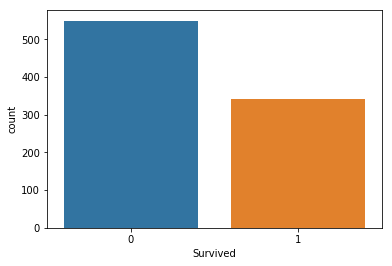

In [856]:
sns.countplot(x='Survived', data=train)
print("Survival rate: ", train.Survived.sum()/train.Survived.count())

In [857]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [858]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [859]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [860]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


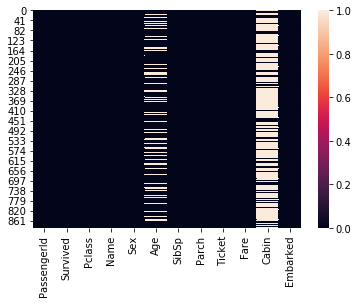

In [861]:
sns.heatmap(train.isnull())

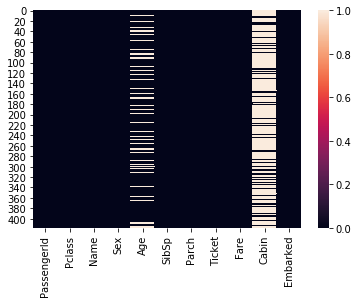

In [862]:
sns.heatmap(test.isnull())

In [863]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [864]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


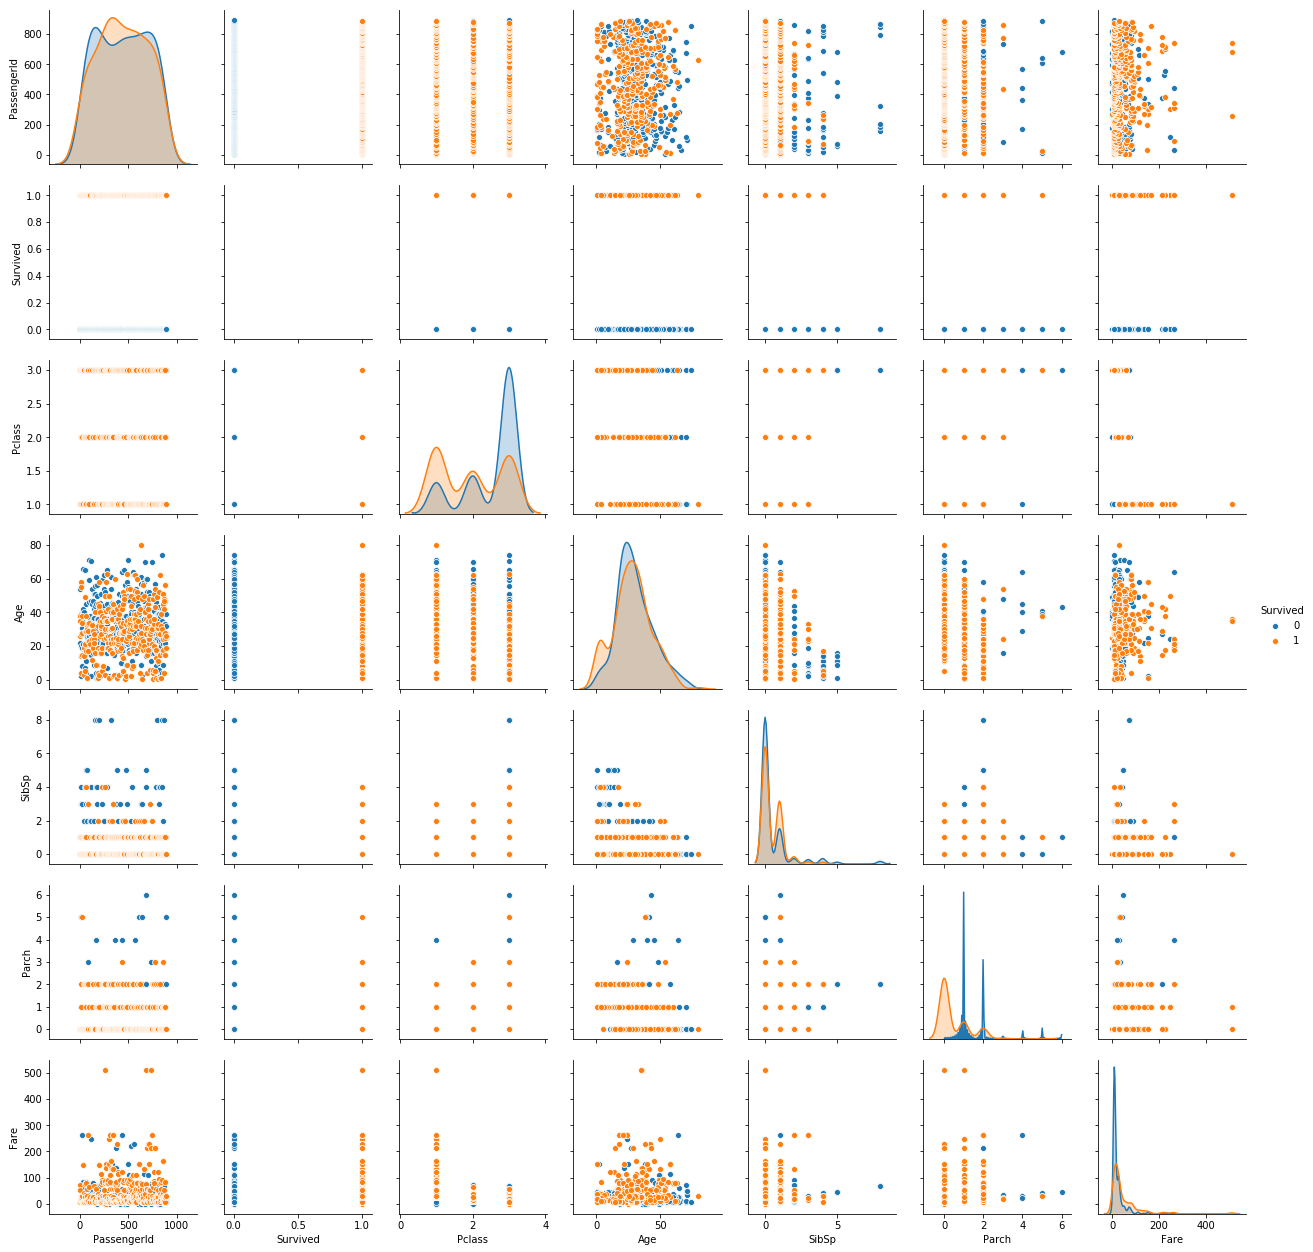

In [865]:
sns.pairplot(train, hue="Survived")

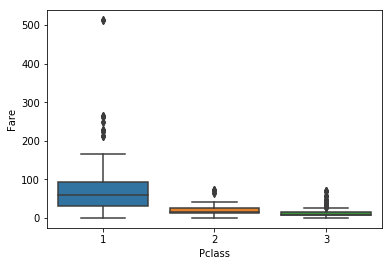

In [866]:
sns.boxplot(x="Pclass", y="Fare",data=train)

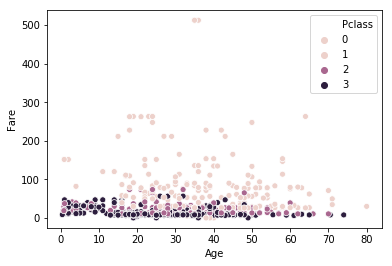

In [867]:
sns.scatterplot(x="Age", y="Fare", hue = 'Pclass', data=train)

In [868]:
train.groupby(['Parch'])['Survived'].count()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64

In [869]:
train.groupby(['SibSp'])['Survived'].count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64

In [870]:
q = train.Fare.quantile(0.99)
q

249.00622000000033

In [871]:
train = train[train['Fare'] < q]

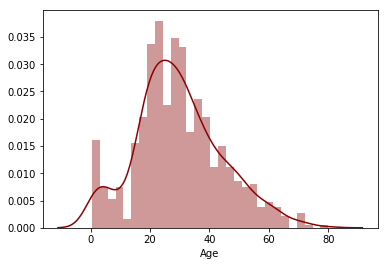

In [872]:
#Handle Nulls
sns.distplot(train['Age'].dropna(),color='darkred',bins=30)

In [873]:
median = train["Age"].median()
std = train["Age"].std()
is_null = train["Age"].isnull().sum()
rand_age = np.random.randint(median - std, median + std, size = is_null)
age_slice = train["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
train["Age"] = age_slice
train["Age"] = train["Age"].astype(int)

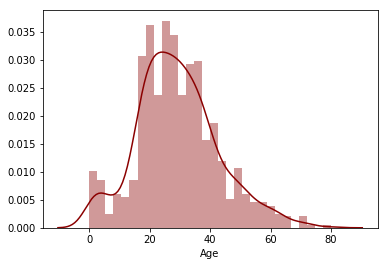

In [874]:
#Check
sns.distplot(train['Age'],color='darkred',bins=30)

In [875]:
train["Age"].isnull().sum()

0

In [876]:
test['Age'].fillna(test['Age'].mean())

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
5      14.00000
6      30.00000
7      26.00000
8      18.00000
9      21.00000
10     30.27259
11     46.00000
12     23.00000
13     63.00000
14     47.00000
15     24.00000
16     35.00000
17     21.00000
18     27.00000
19     45.00000
20     55.00000
21      9.00000
22     30.27259
23     21.00000
24     48.00000
25     50.00000
26     22.00000
27     22.50000
28     41.00000
29     30.27259
         ...   
388    21.00000
389     6.00000
390    23.00000
391    51.00000
392    13.00000
393    47.00000
394    29.00000
395    18.00000
396    24.00000
397    48.00000
398    22.00000
399    31.00000
400    30.00000
401    38.00000
402    22.00000
403    17.00000
404    43.00000
405    20.00000
406    23.00000
407    50.00000
408    30.27259
409     3.00000
410    30.27259
411    37.00000
412    28.00000
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, 

In [877]:
#median = test["Age"].median()
#std = test["Age"].std()
#is_null = test["Age"].isnull().sum()
#rand_age = np.random.randint(median - std, median + std, size = is_null)
#age_slice = test["Age"].copy()
#age_slice[np.isnan(age_slice)] = rand_age
#test["Age"] = age_slice
#test["Age"] = test["Age"].astype(int)

In [878]:
#Check
#sns.distplot(test['Age'],color='darkred',bins=30)

In [879]:
test["Age"].isnull().sum()

86

In [880]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

In [881]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [882]:
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

In [883]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [884]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

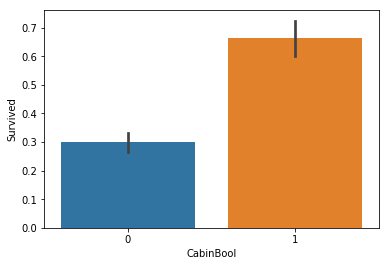

In [885]:
sns.barplot(x="CabinBool", y="Survived", data=train)

In [886]:
#Deck
train['Deck'] = train.Cabin.str.extract('([a-zA-Z]+)', expand=False)
train[['Cabin', 'Deck']].sample(10)
train['Deck'] = train['Deck'].fillna('Z')

#Deck
test['Deck'] = test.Cabin.str.extract('([a-zA-Z]+)', expand=False)
test[['Cabin', 'Deck']].sample(10)
test['Deck'] = test['Deck'].fillna('Z')

In [887]:
train['Deck'] = LabelEncoder().fit_transform(train['Deck'])
test['Deck'] = LabelEncoder().fit_transform(test['Deck'])

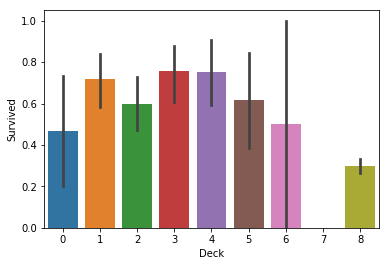

In [888]:
sns.barplot(x="Deck", y="Survived", data=train)

In [889]:
train.groupby(['Embarked'])['Survived'].count()

Embarked
C    163
Q     77
S    640
Name: Survived, dtype: int64

In [890]:
# https://stackoverflow.com/questions/46406720/labelencoder-typeerror-not-supported-between-instances-of-float-and-str
train['Embarked'] = LabelEncoder().fit_transform(train['Embarked'].astype(str))
train['Embarked'] = LabelEncoder().fit_transform(train['Embarked'])
test['Embarked'] = LabelEncoder().fit_transform(test['Embarked'])

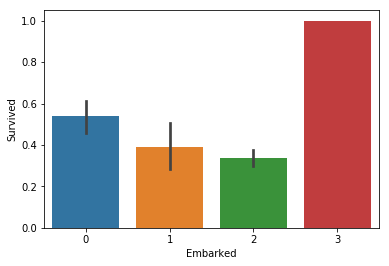

In [891]:
sns.barplot(x="Embarked", y="Survived", data=train)

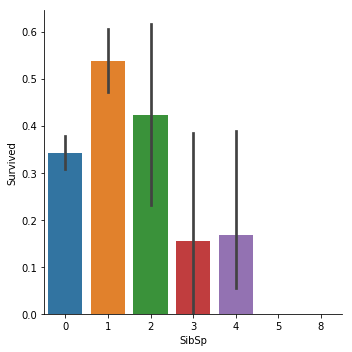

In [892]:
sns.factorplot(x="SibSp", y="Survived", data=train, kind="bar")

In [893]:
bins = [-1, 0, 2, np.inf]
labels = ['None', 'Small', 'Bigger']
train['SibSpBin'] = pd.cut(train["SibSp"], bins, labels = labels)

bins = [-1, 0, 2, np.inf]
labels = ['None', 'Small', 'Bigger']
test['SibSpBin'] = pd.cut(test["SibSp"], bins, labels = labels)

In [894]:
SibSpBin_mapping = {"None": 0, "Small": 1, "Bigger": 2}
train['SibSpBin'] = train['SibSpBin'].map(SibSpBin_mapping)
test['SibSpBin'] = test['SibSpBin'].map(SibSpBin_mapping)


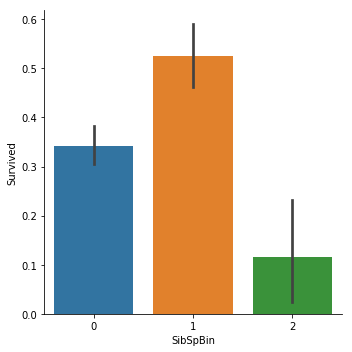

In [895]:
sns.factorplot(x="SibSpBin", y="Survived", data=train, kind="bar")

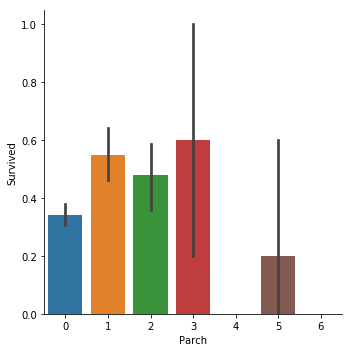

In [896]:
sns.factorplot(x="Parch", y="Survived", data=train, kind="bar")

In [897]:
bins = [-1, 0, 2, np.inf]
labels = ['None', 'Small', 'Bigger']
train['ParchBin'] = pd.cut(train["Parch"], bins, labels = labels)
test['ParchBin'] = pd.cut(test["Parch"], bins, labels = labels)

In [898]:
ParchBin_mapping = {"None": 0, "Small": 1, "Bigger": 2}
train['ParchBin'] = train['ParchBin'].map(ParchBin_mapping)
test['ParchBin'] = test['ParchBin'].map(ParchBin_mapping)

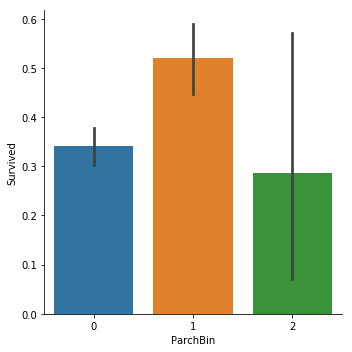

In [899]:
sns.factorplot(x="ParchBin", y="Survived", data=train, kind="bar")

In [900]:
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

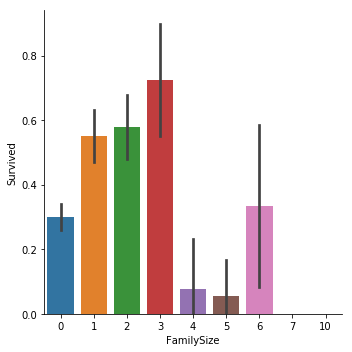

In [901]:
sns.factorplot(x="FamilySize", y="Survived", data=train, kind="bar")

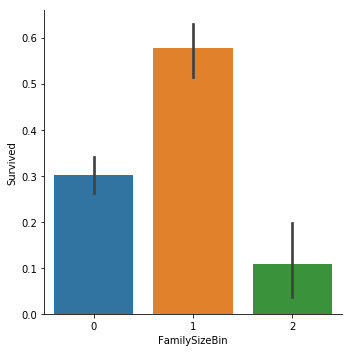

In [902]:
bins = [-1, 0, 3, np.inf]
labels = ['Alone', 'Small', 'Bigger']
train['FamilySizeBin'] = pd.cut(train["FamilySize"], bins, labels = labels)
test['FamilySizeBin'] = pd.cut(test["FamilySize"], bins, labels = labels)

FamilySizeBin_mapping = {"Alone": 0, "Small": 1, "Bigger": 2}
train['FamilySizeBin'] = train['FamilySizeBin'].map(FamilySizeBin_mapping)
test['FamilySizeBin'] = test['FamilySizeBin'].map(FamilySizeBin_mapping)

sns.factorplot(x="FamilySizeBin", y="Survived", data=train, kind="bar")

In [903]:
train['IsAlone'] = 1 #default value
test['IsAlone'] = 1 #default value

In [904]:
train['IsAlone'].loc[train['FamilySize'] > 0] = 0
test['IsAlone'].loc[test['FamilySize'] > 0] = 0

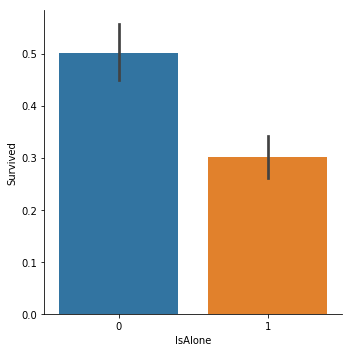

In [905]:
sns.factorplot(x="IsAlone", y="Survived", data=train, kind="bar")

In [906]:
train['AgeBin'] = pd.cut(train['Age'].astype(int), 5)
test['AgeBin'] = pd.cut(test['Age'].astype(int), 5)

train['AgeBin'] = LabelEncoder().fit_transform(train['AgeBin'])
test['AgeBin'] = LabelEncoder().fit_transform(test['AgeBin'])

sns.barplot(x="AgeBin", y="Survived", data=train)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
#is Baby

train['IsBaby'] = 0 #default value
test['IsBaby'] = 0 #default value

train['IsBaby'].loc[train['Age'] < 6] = 1
test['IsBaby'].loc[test['Age'] < 6] = 1

sns.factorplot(x="IsBaby", y="Survived", data=train, kind="bar")

In [ ]:
train['AgeBinClass']= train['AgeBin']* test['Pclass']
test['AgeBinClass']= test['AgeBin']* test['Pclass']

sns.factorplot(x="AgeBinClass", y="Survived", data=train, kind="bar")

In [ ]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title'] = train['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')  
train['Title'] = train['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')


test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

test['Title'] = test['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')  
test['Title'] = test['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [ ]:
train['Title'] = train['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Royal', 'Rare'], [0, 1, 2, 3, 4, 5]) # Other way to encode a feature
test['Title'] = test['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Royal', 'Rare'], [0, 1, 2, 3, 4, 5]) # Other way to encode a feature

In [ ]:
sns.barplot(x="Title", y="Survived", data=train)

In [ ]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping) # Yet another way to encode
test['Sex'] = test['Sex'].map(sex_mapping) # Yet another way to encode

In [ ]:
sns.barplot(x="Sex", y="Survived", data=train)

In [ ]:
sns.distplot(train['Fare'])

In [ ]:
train['FareBin'] = pd.qcut(train['Fare'], 10)
test['FareBin'] = pd.qcut(test['Fare'], 10)

train['FareBin'] = LabelEncoder().fit_transform(train['FareBin'])
test['FareBin'] = LabelEncoder().fit_transform(test['FareBin'])

sns.barplot(x="FareBin", y="Survived", data=train)

In [ ]:
# Correlation

def correlation_heatmap(df, method):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(method=method),
        cmap = colormap,
        square=True, 
        annot=True, 
        annot_kws={'fontsize':9 }
    )
    
    plt.title('Correlation Matrix', y=1.05, size=15)

In [ ]:
correlation_heatmap(train, 'spearman')

In [ ]:
to_drop = ["PassengerId","Name", "SibSp", "Age", "SibSp", "Parch","Embarked", "Ticket", "Cabin", "Fare", "Deck", "AgeBinClass"]
train.drop(to_drop, axis=1, inplace=True)

ID = test['PassengerId']
test.drop(to_drop, axis=1, inplace=True)

In [ ]:
train.columns

In [ ]:
test.columns

In [ ]:
# Get variables for a model
x = train.drop(["Survived"], axis=1)

X_train = x
y_train = train["Survived"]
X_test = test

In [ ]:
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
#    gaussian_process.GaussianProcessClassifier(),
    linear_model.LogisticRegressionCV(),
#    linear_model.RidgeClassifierCV(),
    linear_model.Perceptron(),
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(),
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    xgb.XGBClassifier()
    ]

In [ ]:
col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
for a in MLA:
    
    a.fit(X_train, y_train)
    pred = a.predict(X_test)
    cv_mean = cross_val_score(a, X_train, y_train).mean()
    cv_std = cross_val_score(a, X_train, y_train).std()
    
    Alg = a.__class__.__name__
    
    algorithms.loc[idx, 'Algorithm'] = Alg
    algorithms.loc[idx, 'CV Score'] = round((cv_mean - cv_std) * 100, 2)

    idx+=1

In [ ]:
algorithms.sort_values(by = ['CV Score'], ascending = False, inplace = True)    
algorithms

In [ ]:
g = sns.barplot("CV Score", "Algorithm", data = algorithms)
g.set_xlabel("CV score")
g = g.set_title("Algorithm Scores")

In [ ]:
kfold = StratifiedKFold(n_splits=10)

In [ ]:
# SVC Classifier
SVC = svm.SVC(probability=True)
svc_param = {
    'kernel': ['rbf'], 
    'gamma': [ 0.001, 0.01, 0.1, 1],
    'C': [1, 10, 50, 100,200,300, 1000]
    }

gsSVC = GridSearchCV(SVC, param_grid = svc_param, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVC.fit(X_train,y_train)
SVC_best = gsSVC.best_estimator_

# Best score
gsSVC.best_score_

In [ ]:
# XGBoost Classifier
XGB = XGBClassifier()
xgb_param = {
#    'loss' : ["deviance"],
     'n_estimators' : [100,200,300,500],
     'learning_rate': [0.1, 0.05, 0.01],
     'max_depth': [4, 8, 12],
#     'min_samples_leaf': [100,150],
#     'max_features': [0.3, 0.1] 
    }

gsXGB = GridSearchCV(XGB, param_grid = xgb_param, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsXGB.fit(X_train,y_train)
XGB_best = gsXGB.best_estimator_

# Best score
gsXGB.best_score_

In [ ]:
# Gradient Boosting Classifier
GB = ensemble.GradientBoostingClassifier()
gb_param = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGB.fit(X_train,y_train)
GB_best = gsGB.best_estimator_

# Best score
gsGB.best_score_

In [ ]:
vc = ensemble.VotingClassifier(
    estimators = [('xgb', XGB_best), ('gbc',GB_best), ('svc', SVC_best)],
    voting='soft', n_jobs=4)

In [ ]:
vc = vc.fit(X_train, y_train)
pred = vc.predict(X_test)
cv = cross_val_score(vc, X_train, y_train).mean()

print("y_scores = vc.predict_proba(X_train)
y_scores = y_scores[:,1]CV Score: ", round(cv*100,2))

In [ ]:
y_scores = vc.predict_proba(X_train)
y_scores = y_scores[:,1]

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

In [ ]:
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

In [ ]:
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)

In [ ]:
auroc = roc_auc_score(y_train, y_scores)
print("ROC-AUC Score:", auroc)

In [ ]:
score = pd.DataFrame(vc.predict(X_train), columns=['Survived'])
output = pd.concat([pd.DataFrame(ID), pd.DataFrame(pred)], axis=1)
output.to_csv('submission.csv', index=False, header=True)